In [5]:
import numpy as np
import cvxpy as cp
from scipy.linalg import eigh
from numpy.typing import NDArray
from scipy.linalg import svd, logm, expm, qr, eig, expm
from scipy.stats import gamma
import pandas as pd
import scipy.stats as stats
import scipy.signal as signal
import seaborn as sns

# import all functions from stiefel.py
from stiefel import *

# set seed
seed = 41
np.random.seed(seed)

from matplotlib import pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import axes3d

params = {
    # 'text.latex.preamble': ['\\usepackage{gensymb}'],
    # 'image.origin': 'lower',
    # 'image.interpolation': 'nearest',
    # 'image.cmap': 'gray',
    'axes.grid': False,
    'savefig.dpi': 300,  # to adjust notebook inline plot size
    'axes.labelsize': 13, # fontsize for x and y labels (was 10)
    'axes.titlesize': 13,
    'font.size': 13, # was 10
    'legend.fontsize': 8, # was 10
    'xtick.labelsize': 13,
    'ytick.labelsize': 13,
    'text.usetex': False,
    # 'figure.figsize': [3.39, 2.10],
    'figure.figsize': [3.39, 3.39],
    'font.family': 'serif',
}
mpl.rcParams.update(params)

In [6]:
# we want to pick up 4 points on the sphere, x, y, z (including the basepoint)
base_pt = np.array([0, 0, 1])

# pick up 3 points on the surface of the sphere (excluding the basepoint) around the basepoint at a certain angle
# the angle is in radians
phi1 = 60 * np.pi / 180                  # 60 degrees: governs the angle from the y-axis (north or south pole)
phi2 = 75 * np.pi / 180
phi3 = 35 * np.pi / 180
theta1 = 0 * np.pi / 180                # 0 degrees: governs the angle in the x-y plane (aximuthal angle)
theta2 = 70 * np.pi / 180
theta3 = 240 * np.pi / 180

# phi_p = np.array([phi, phi, phi])
phi_p = np.array([phi1, phi2, phi3])
theta_p = np.array([theta1, theta2, theta3])
# the points on the sphere
x_i = np.cos(theta_p) * np.sin(phi_p)
y_i = np.sin(theta_p) * np.sin(phi_p)
z_i = np.cos(phi_p)

print("Points on the sphere:")
for i in range(3):
    # print(f"({x_i_array[i]}, {y_i_array[i]}, {z_i_array[i]})")
    print(f"({x_i[i]}, {y_i[i]}, {z_i[i]})")
    print("Radius:", np.sqrt(x_i[i] ** 2 + y_i[i] ** 2 + z_i[i] ** 2))


########################################################################################################################
# pick up 3 points on the surface of the sphere for pts_tilda
# phi_tilda = 48 * np.pi / 180
phi1_tilda = (60-12) * np.pi / 180                  # 60 degrees: governs the angle from the y-axis (north or south pole)
phi2_tilda = (75-12) * np.pi / 180
phi3_tilda = (35-12) * np.pi / 180
theta1_tilda = 0 * np.pi / 180
theta2_tilda = 70 * np.pi / 180
theta3_tilda = 240 * np.pi / 180

# phi_p_tilda = np.array([phi_tilda, phi_tilda, phi_tilda])
phi_p_tilda = np.array([phi1_tilda, phi2_tilda, phi3_tilda])
theta_p_tilda = np.array([theta1_tilda, theta2_tilda, theta3_tilda])
# the points on the sphere
x_i_tilda = np.cos(theta_p_tilda) * np.sin(phi_p_tilda)
y_i_tilda = np.sin(theta_p_tilda) * np.sin(phi_p_tilda)
z_i_tilda = np.cos(phi_p_tilda)

print("###############################################################################################################")
print("Points tilda on the sphere:")
for i in range(3):
    # print(f"({x_i_array[i]}, {y_i_array[i]}, {z_i_array[i]})")
    print(f"({x_i_tilda[i]}, {y_i_tilda[i]}, {z_i_tilda[i]})")
    print("Radius:", np.sqrt(x_i_tilda[i] ** 2 + y_i_tilda[i] ** 2 + z_i_tilda[i] ** 2))

Points on the sphere:
(0.8660254037844386, 0.0, 0.5000000000000001)
Radius: 1.0
(0.3303660895493522, 0.9076733711903686, 0.25881904510252074)
Radius: 0.9999999999999999
(-0.2867882181755233, -0.49673176489215387, 0.8191520442889918)
Radius: 0.9999999999999999
###############################################################################################################
Points tilda on the sphere:
(0.7431448254773941, 0.0, 0.6691306063588582)
Radius: 0.9999999999999999
(0.30474217910701157, 0.8372722558519101, 0.4539904997395468)
Radius: 0.9999999999999999
(-0.19536556424463702, -0.33838308332107253, 0.9205048534524404)
Radius: 1.0


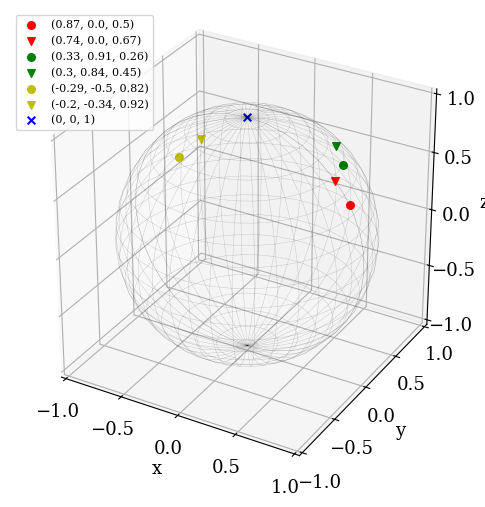

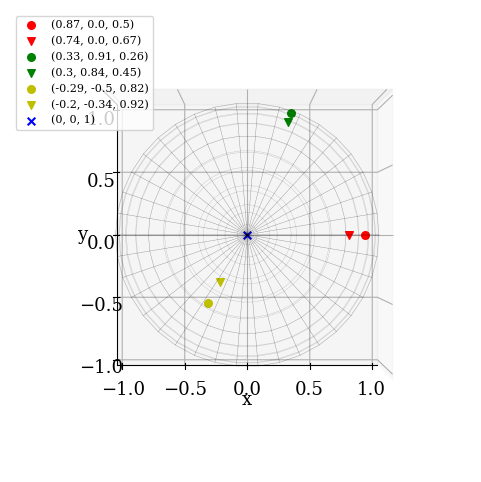

In [7]:
# plot them out to see
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d", aspect="equal")
C = ['r', 'g', 'y']
for i in range(3):
    ax.scatter(x_i[i], y_i[i], z_i[i], s=30, c=C[i], zorder=5, marker='o', label=f"({np.round(x_i[i], 2)}, {np.round(y_i[i], 2)}, {np.round(z_i[i], 2)})")
    ax.scatter(x_i_tilda[i], y_i_tilda[i], z_i_tilda[i], s=30, c=C[i], zorder=5, marker='v', label=f"({np.round(x_i_tilda[i], 2)}, {np.round(y_i_tilda[i], 2)}, {np.round(z_i_tilda[i], 2)})")
# plot basepoint
ax.scatter(base_pt[0], base_pt[1], base_pt[2], s=30, c='b', zorder=5, marker='x', label=f"({base_pt[0]}, {base_pt[1]}, {base_pt[2]})")
# ax.text(base_pt[0], base_pt[1], base_pt[2], f"({np.round(base_pt[0], 2)}, {np.round(base_pt[1], 2)}, {np.round(base_pt[2], 2)})", size=10, zorder=10, color='k')

phi = np.linspace(0, np.pi, 20)
theta = np.linspace(0, 2 * np.pi, 40)
x = np.outer(np.sin(theta), np.cos(phi))
y = np.outer(np.sin(theta), np.sin(phi))
z = np.outer(np.cos(theta), np.ones_like(phi))

# fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d', 'aspect':'equal'})
ax.plot_wireframe(x, y, z, color='k', rstride=1, cstride=1, linewidth=0.3, alpha=0.2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(loc = 'upper left')
# set the limit of the axes to be the same
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
# set ticks
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_yticks([-1, -0.5, 0, 0.5, 1])
ax.set_zticks([-1, -0.5, 0, 0.5, 1])
# axis off
# ax.set_axis_off()
plt.show()

# plot them out to see
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d", aspect="equal")
C = ['r', 'g', 'y']
for i in range(3):
    ax.scatter(x_i[i], y_i[i], z_i[i], s=30, c=C[i], zorder=5, marker='o', label=f"({np.round(x_i[i], 2)}, {np.round(y_i[i], 2)}, {np.round(z_i[i], 2)})")
    ax.scatter(x_i_tilda[i], y_i_tilda[i], z_i_tilda[i], s=30, c=C[i], zorder=5, marker='v', label=f"({np.round(x_i_tilda[i], 2)}, {np.round(y_i_tilda[i], 2)}, {np.round(z_i_tilda[i], 2)})")
# plot basepoint
ax.scatter(base_pt[0], base_pt[1], base_pt[2], s=30, c='b', zorder=5, marker='x', label=f"({base_pt[0]}, {base_pt[1]}, {base_pt[2]})")

phi = np.linspace(0, np.pi, 20)
theta = np.linspace(0, 2 * np.pi, 40)
x = np.outer(np.sin(theta), np.cos(phi))
y = np.outer(np.sin(theta), np.sin(phi))
z = np.outer(np.cos(theta), np.ones_like(phi))

ax.plot_wireframe(x, y, z, color='k', rstride=1, cstride=1, linewidth=0.3, alpha=0.2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(loc = 'upper left')
# set the limit of the axes to be the same
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
# set ticks
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_yticks([-1, -0.5, 0, 0.5, 1])
ax.set_zticks([-1, -0.5, 0, 0.5, 1])

# Set the view to top
ax.view_init(elev=90, azim=-90)
# turn off z axis
ax.set_zticks([])
ax.set_zticklabels([])
ax.set_zlabel('')

plt.show()


In [167]:
# make it an array
base_pt_array = np.array([base_pt]).flatten()             # shape: (3,) # dim : x, y, z
model_pts_array = np.vstack([x_i, y_i, z_i]).T            # shape: (N, 3)
model_tilda_pts_array = np.vstack([x_i_tilda, y_i_tilda, z_i_tilda]).T            # shape: (N, 3)
print("base_pt_array: \n", base_pt_array)
print("model_pts_array: \n", model_pts_array)
print("model_tilda_pts_array: \n", model_tilda_pts_array)

base_pt_array: 
 [0 0 1]
model_pts_array: 
 [[ 0.8660254   0.          0.5       ]
 [ 0.33036609  0.90767337  0.25881905]
 [-0.28678822 -0.49673176  0.81915204]]
model_tilda_pts_array: 
 [[ 0.74314483  0.          0.66913061]
 [ 0.30474218  0.83727226  0.4539905 ]
 [-0.19536556 -0.33838308  0.92050485]]


In [168]:
def generate_points_with_fixed_phi(fix_phi, d_theta, num_samples_per_angle, seed=41):
    # Set seed for reproducibility
    np.random.seed(seed)
    
    # Define theta samplings
    theta_1_sampling = np.linspace((0 - d_theta) * np.pi / 180, (0 + d_theta) * np.pi / 180, 100)
    theta_2_sampling = np.linspace((120 - d_theta) * np.pi / 180, (120 + d_theta) * np.pi / 180, 100)
    theta_3_sampling = np.linspace((240 - d_theta) * np.pi / 180, (240 + d_theta) * np.pi / 180, 100)

    theta_samples = []
    for i in range(3):
        theta_samples.append(np.random.default_rng(seed).choice([theta_1_sampling, theta_2_sampling, theta_3_sampling][i], size=num_samples_per_angle, replace=False))

    x_i_samples = []
    y_i_samples = []
    z_i_samples = []

    for i in range(3):
        # repeat the same phi
        phi_samples = np.repeat(fix_phi, num_samples_per_angle)
        x_i_samples.append(np.cos(theta_samples[i]) * np.sin(phi_samples))
        y_i_samples.append(np.sin(theta_samples[i]) * np.sin(phi_samples))
        z_i_samples.append(np.cos(phi_samples))

    # Stack the samples into a single array
    x_i_samples = np.hstack(x_i_samples)
    y_i_samples = np.hstack(y_i_samples)
    z_i_samples = np.hstack(z_i_samples)
    # theta
    theta_samples = np.hstack(theta_samples)
    # phi
    phi_samples = np.repeat(fix_phi, num_samples_per_angle * 3)

    return x_i_samples, y_i_samples, z_i_samples, theta_samples, phi_samples


def is_point_inside_triangle(point, vertex1, vertex2, vertex3):
    # Calculate barycentric coordinates
    v0 = vertex3 - vertex1
    v1 = vertex2 - vertex1
    v2 = point - vertex1

    dot00 = np.dot(v0, v0)
    dot01 = np.dot(v0, v1)
    dot02 = np.dot(v0, v2)
    dot11 = np.dot(v1, v1)
    dot12 = np.dot(v1, v2)

    # Compute barycentric coordinates
    inv_denom = 1.0 / (dot00 * dot11 - dot01 * dot01)
    u = (dot11 * dot02 - dot01 * dot12) * inv_denom
    v = (dot00 * dot12 - dot01 * dot02) * inv_denom

    # Check if the point is inside the triangle
    return (u >= 0) and (v >= 0) and (u + v <= 1)


# define a geodesic distance function
def geodesic_distance(pt1, pt2):
    """
    Assume unit sphere
    """
    r = 1
    d = r * np.arccos((pt1 @ pt2.T)/r)  # arccos of the dot product
    
    return d

# generate samples with marsaglia's method 1972
def marsaglia_sampling(num_points, vertex1, vertex2, vertex3):
    points = []
    
    while len(points) < num_points:
        x1, x2 = np.random.uniform(-1, 1, 2)
        r_squared = x1**2 + x2**2

        if r_squared < 1:
            normalized_point = [2*x1*np.sqrt(1-r_squared), 2*x2*np.sqrt(1-r_squared), 1-2*r_squared]

            # Check if the point is inside the specified triangle and z > = 0.5
            if is_point_inside_triangle(np.array(normalized_point), np.array(vertex1), np.array(vertex2), np.array(vertex3)) and normalized_point[2] >= 0.5:
                points.append(normalized_point)


            # points.append(normalized_point)
            # print("Radius:", np.sqrt(normalized_point[0] ** 2 + normalized_point[1] ** 2 + normalized_point[2] ** 2))

    return np.array(points)

In [169]:
sample_points_array = marsaglia_sampling(3000, model_pts_array[0, :], model_pts_array[1, :], model_pts_array[2, :])

#  remove points where z>0.5
# sample_points_array = sample_points_array[sample_points_array[:, 2] <= 0.8]
print("number of points:", sample_points_array.shape[0])

number of points: 3000


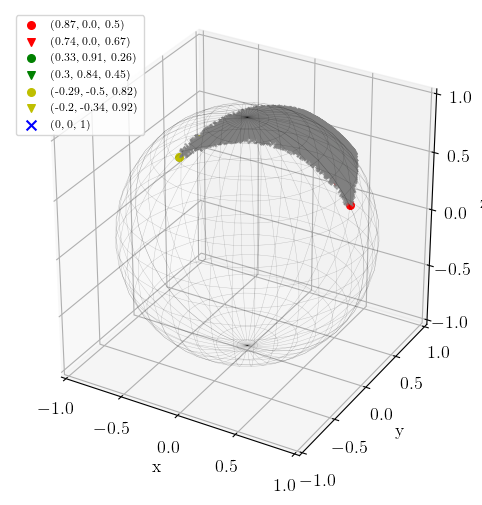

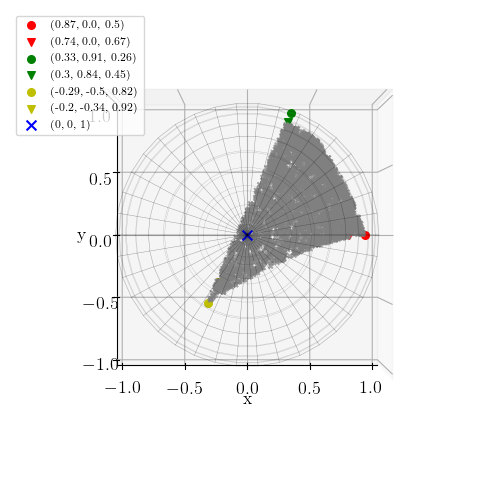

In [170]:
# lets plot them out and see
# plot them out to see
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d", aspect="equal")
C = ['r', 'g', 'y']
for i in range(3):
    ax.scatter(model_pts_array[i, 0], model_pts_array[i, 1], model_pts_array[i, 2], s=30, c=C[i], zorder=5, marker='o', label=f"({np.round(model_pts_array[i, 0], 2)}, {np.round(model_pts_array[i, 1], 2)}, {np.round(model_pts_array[i, 2], 2)})")
    # plot tilda
    ax.scatter(x_i_tilda[i], y_i_tilda[i], z_i_tilda[i], s=30, c=C[i], zorder=5, marker='v', label=f"({np.round(x_i_tilda[i], 2)}, {np.round(y_i_tilda[i], 2)}, {np.round(z_i_tilda[i], 2)})")
# plot the points
ax.scatter(sample_points_array[:, 0], sample_points_array[:, 1], sample_points_array[:, 2], s=30, c='gray', zorder=5, marker='x', alpha=0.7)
# plot basepoint
ax.scatter(base_pt_array[0], base_pt_array[1], base_pt_array[2], s=50, c='b', zorder=5, marker='x', label=f"({base_pt_array[0]}, {base_pt_array[1]}, {base_pt_array[2]})")

phi = np.linspace(0, np.pi, 20)
theta = np.linspace(0, 2 * np.pi, 40)
x = np.outer(np.sin(theta), np.cos(phi))
y = np.outer(np.sin(theta), np.sin(phi))
z = np.outer(np.cos(theta), np.ones_like(phi))

# fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d', 'aspect':'equal'})
ax.plot_wireframe(x, y, z, color='k', rstride=1, cstride=1, linewidth=0.3, alpha=0.2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(loc = 'upper left')
# set the limit of the axes to be the same
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
# set ticks
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_yticks([-1, -0.5, 0, 0.5, 1])
ax.set_zticks([-1, -0.5, 0, 0.5, 1])
# axis off
# ax.set_axis_off()
plt.show()

# plot them out to see
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d", aspect="equal")
C = ['r', 'g', 'y']
for i in range(3):
    ax.scatter(model_pts_array[i, 0], model_pts_array[i, 1], model_pts_array[i, 2], s=30, c=C[i], zorder=5, marker='o', label=f"({np.round(model_pts_array[i, 0], 2)}, {np.round(model_pts_array[i, 1], 2)}, {np.round(model_pts_array[i, 2], 2)})")
    # plot tilda
    ax.scatter(x_i_tilda[i], y_i_tilda[i], z_i_tilda[i], s=30, c=C[i], zorder=5, marker='v', label=f"({np.round(x_i_tilda[i], 2)}, {np.round(y_i_tilda[i], 2)}, {np.round(z_i_tilda[i], 2)})")
# plot basepoint
ax.scatter(base_pt_array[0], base_pt_array[1], base_pt_array[2], s=50, c='b', zorder=5, marker='x', label=f"({base_pt_array[0]}, {base_pt_array[1]}, {base_pt_array[2]})")
# plot the points
ax.scatter(sample_points_array[:, 0], sample_points_array[:, 1], sample_points_array[:, 2], s=10, c='gray', zorder=5, marker='x', alpha=0.7)

phi = np.linspace(0, np.pi, 20)
theta = np.linspace(0, 2 * np.pi, 40)
x = np.outer(np.sin(theta), np.cos(phi))
y = np.outer(np.sin(theta), np.sin(phi))
z = np.outer(np.cos(theta), np.ones_like(phi))

ax.plot_wireframe(x, y, z, color='k', rstride=1, cstride=1, linewidth=0.3, alpha=0.2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(loc = 'upper left')
# set the limit of the axes to be the same
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
# set ticks
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_yticks([-1, -0.5, 0, 0.5, 1])
ax.set_zticks([-1, -0.5, 0, 0.5, 1])

# Set the view to top
ax.view_init(elev=90, azim=-90)
# turn off z axis
ax.set_zticks([])
ax.set_zticklabels([])
ax.set_zlabel('')

plt.show()


In [172]:
# distance between basepoint and model points
print("Distance between basepoint and model points:")
for i in range(3):
    print(f"({np.round(x_i[i], 2)}, {np.round(y_i[i], 2)}, {np.round(z_i[i], 2)})")
    print("Geodesic distance:", geodesic_distance(base_pt, np.array([x_i[i], y_i[i], z_i[i]])))
    print("Euclidean distance:", np.linalg.norm(base_pt - np.array([x_i[i], y_i[i], z_i[i]])))

Distance between basepoint and model points:
(0.87, 0.0, 0.5)
Geodesic distance: 1.0471975511965976
Euclidean distance: 0.9999999999999999
(0.33, 0.91, 0.26)
Geodesic distance: 1.3089969389957472
Euclidean distance: 1.2175228580174413
(-0.29, -0.5, 0.82)
Geodesic distance: 0.6108652381980152
Euclidean distance: 0.6014115990085461


### now lets construct an analytical forward map

In [173]:
def model(model_pts, samples, eps):
    """
    The analytical solution of the forward map
    Args:
        model_pts: the points on the sphere (N_samples, 3)
        samples: the samples on the sphere (N_samples, 3)
    Returns:
        The output of the forward map (N_samples,)
    """

    print("We have {} model points and {} samples".format(len(model_pts), len(samples)))

    f = np.zeros(len(samples))

    for i in range(len(samples)):
        for j in range(len(model_pts)):
            norm = np.linalg.norm(samples[i, :] - model_pts[j, :])
            f[i] += np.exp(-norm / eps)
    
    return f


def gaussian_kernel(model_pts, samples, sigma):
    """
    The analytical solution of the forward map
    Args:
        model_pts: the points on the sphere (N_samples, 3)
        samples: the samples on the sphere (N_samples, 3)
    Returns:
        The output of the forward map (N_samples,)
    """

    print("We have {} model points and {} samples".format(len(model_pts), len(samples)))

    f = np.zeros((len(samples), len(model_pts)))
    f_c = np.array([5, 10, 40])

    for i in range(len(samples)):
        for j in range(len(model_pts)):
            f[i, j] = 1/(np.sqrt(2*np.pi)*sigma) * np.exp(-1/2 * np.linalg.norm(samples[i, :] - model_pts[j, :])**2 / sigma**2)* f_c[j]
    
    f_sum = np.sum(f, axis=1)

    return f_sum, f

In [174]:
print("sample_points_array.shape:", sample_points_array.shape)
print("model_pts_array: \n", model_pts_array)
print("model_tilda_pts_array: \n", model_tilda_pts_array)

sample_points_array.shape: (3000, 3)
model_pts_array: 
 [[ 0.8660254   0.          0.5       ]
 [ 0.33036609  0.90767337  0.25881905]
 [-0.28678822 -0.49673176  0.81915204]]
model_tilda_pts_array: 
 [[ 0.74314483  0.          0.66913061]
 [ 0.30474218  0.83727226  0.4539905 ]
 [-0.19536556 -0.33838308  0.92050485]]


We have 3 model points and 3000 samples
0.006537483561706468 95.62297580404363


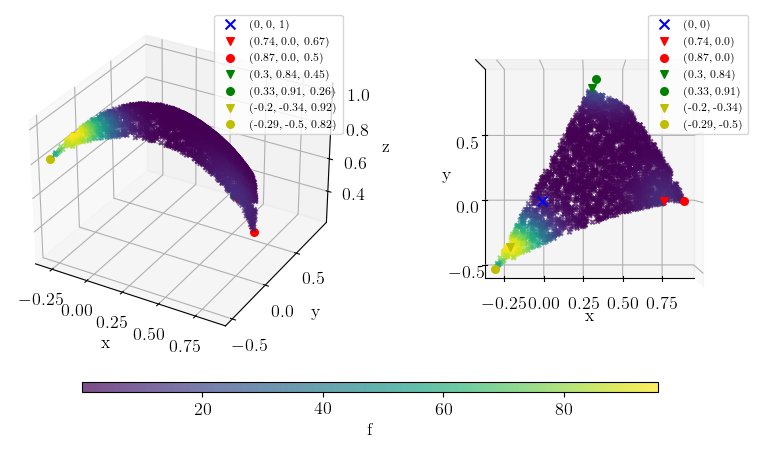

In [175]:
# f = model(model_pts_array, sample_points_array, 1/100)
f, f_array = gaussian_kernel(model_tilda_pts_array, sample_points_array, 1/6)
print(min(f), max(f))

# plot f in 3D
fig = plt.figure(figsize=(8*1.2, 4*1.2))
# 1 row and 2 columns
axes = fig.subplots(1, 2, subplot_kw={'projection':'3d'})
# first is a 3d plot and 2nd is a top view
scatter = axes[0].scatter(sample_points_array[:, 0], sample_points_array[:, 1], sample_points_array[:, 2], s=10, c=f, zorder=5, marker='x', alpha=0.7)
axes[0].scatter(base_pt_array[0], base_pt_array[1], base_pt_array[2], s=50, c='b', zorder=5, marker='x', label=f"({base_pt_array[0]}, {base_pt_array[1]}, {base_pt_array[2]})")
C = ['r', 'g', 'y']
for i in range(3):
    axes[0].scatter(model_tilda_pts_array[i, 0], model_tilda_pts_array[i, 1], model_tilda_pts_array[i, 2], s=30, c=C[i], zorder=5, marker='v', label=f"({np.round(model_tilda_pts_array[i, 0], 2)}, {np.round(model_tilda_pts_array[i, 1], 2)}, {np.round(model_tilda_pts_array[i, 2], 2)})")
    axes[0].scatter(model_pts_array[i, 0], model_pts_array[i, 1], model_pts_array[i, 2], s=30, c=C[i], zorder=5, marker='o', label=f"({np.round(model_pts_array[i, 0], 2)}, {np.round(model_pts_array[i, 1], 2)}, {np.round(model_pts_array[i, 2], 2)})")
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_zlabel('z')
axes[0].legend(loc = 'upper right')

# top view
axes[1].scatter(sample_points_array[:, 0], sample_points_array[:, 1], s=10, c=f, zorder=5, marker='x', alpha=0.7)
axes[1].scatter(base_pt_array[0], base_pt_array[1], s=50, c='b', zorder=5, marker='x', label=f"({base_pt_array[0]}, {base_pt_array[1]})")
C = ['r', 'g', 'y']
for i in range(3):
    axes[1].scatter(model_tilda_pts_array[i, 0], model_tilda_pts_array[i, 1], s=30, c=C[i], zorder=5, marker='v', label=f"({np.round(model_tilda_pts_array[i, 0], 2)}, {np.round(model_tilda_pts_array[i, 1], 2)})")
    axes[1].scatter(model_pts_array[i, 0], model_pts_array[i, 1], s=30, c=C[i], zorder=5, marker='o', label=f"({np.round(model_pts_array[i, 0], 2)}, {np.round(model_pts_array[i, 1], 2)})")
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].legend(loc = 'upper right')
# top view
axes[1].view_init(elev=90, azim=-90)
# turn off z axis
axes[1].set_zticks([])

# colorbar
# create a custom axes for colorbar at the bottom of the figure
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02])  # adjust the values as needed
fig.colorbar(scatter, cax=cbar_ax, orientation='horizontal', label='f')

plt.show()

In [176]:
print(f.shape)
print(f_array.shape)

(3000,)
(3000, 3)


min and max of f1_w: 1.3573727480852132e-09 11.938578056973025
min and max of f2_w: 1.7508024015570944e-16 22.504475066295768
min and max of f3_w: 1.8629984301976006e-12 95.6229757537184


Text(0, 0.5, 'density')

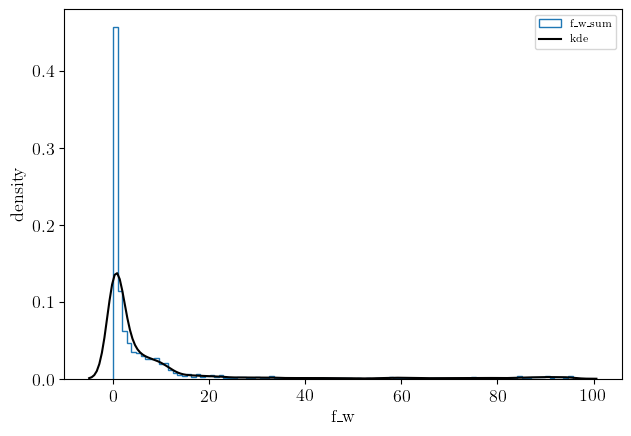

In [177]:
# saw we give different linear combinations of the model points, we get different f
w = np.array([1, 1, 1])
# multiply each f with the corresponding weight
# f_c = np.array([0, 0, 0])
f_c = np.array([5, 10, 40])
# f1 with w1
f1_w = w[0] * f_array[:, 0]
print("min and max of f1_w:", min(f1_w), max(f1_w))
# f2 with w2
f2_w = w[1] * f_array[:, 1]
print("min and max of f2_w:", min(f2_w), max(f2_w))
# f3 with w3
f3_w = w[2] * f_array[:, 2]
print("min and max of f3_w:", min(f3_w), max(f3_w))

# plot the histogram of f_w
fig, ax = plt.subplots(1, 1, figsize=(6*1.2, 4*1.2))
# plot individual f_w
# # plot hist
# ax.hist(f1_w, bins=100, density=True, histtype='step', label='f1_w')
# ax.hist(f2_w, bins=100, density=True, histtype='step', label='f2_w')
# ax.hist(f3_w, bins=100, density=True, histtype='step', label='f3_w')

# ax.axvline(max_f1_w, color='r', linestyle='--', label='max_f1_w')
# ax.axvline(max_f2_w, color='g', linestyle='--', label='max_f2_w')
# ax.axvline(max_f3_w, color='y', linestyle='--', label='max_f3_w')


# ax.hist(f1_w, bins=100, density=True, histtype='step', label='f1_w')
# ax.hist(f2_w, bins=100, density=True, histtype='step', label='f2_w')
# ax.hist(f3_w, bins=100, density=True, histtype='step', label='f3_w')

# mode of f1_w , f2_w, f3_w
# mean_f1_w = np.mean(f1_w)
# mean_f2_w = np.mean(f2_w)
# mean_f3_w = np.mean(f3_w)
# plot the mean
# ax.axvline(mean_f1_w, color='r', linestyle='--', label='mean_f1_w')
# ax.axvline(mean_f2_w, color='g', linestyle='--', label='mean_f2_w')
# ax.axvline(mean_f3_w, color='y', linestyle='--', label='mean_f3_w')


f_w_sum = f1_w + f2_w + f3_w
ax.hist(f_w_sum, bins=100, density=True, histtype='step', label='f_w_sum')
sns.kdeplot(f_w_sum, color='k', label='kde', bw_method=0.09)
# # plot the modes of fi_w
# mode_f1_w = np.argmax(f1_w)
# mode_f2_w = np.argmax(f2_w)
# mode_f3_w = np.argmax(f3_w)

# ax.axvline(f_w_sum[mode_f1_w], color='r', linestyle='--', label='mode_f1_w')
# ax.axvline(f_w_sum[mode_f2_w], color='g', linestyle='--', label='mode_f2_w')
# ax.axvline(f_w_sum[mode_f3_w], color='y', linestyle='--', label='mode_f3_w')

# legend
ax.legend(loc='upper right')
ax.set_xlabel('f_w')
ax.set_ylabel('density')

f_w_sum.shape: (3000,)
num of samples: 104
min and max of samples: -0.2983856905474104 0.9937808051199682


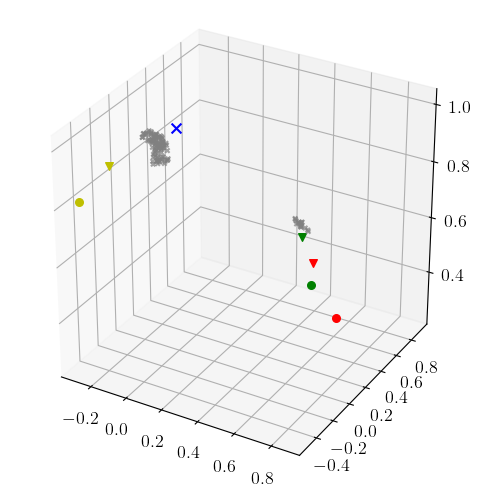

In [178]:
print("f_w_sum.shape:", f_w_sum.shape)

supp_array = np.array([20, 40])
# lets find samples of f_w_sum < 6.5 and > 5.5
# find the indices of the samples
indices = np.where((f_w_sum > supp_array[0]) & (f_w_sum < supp_array[1]))
print("num of samples:", len(indices[0]))
# find the samples
samples = sample_points_array[indices]
print("min and max of samples:", np.min(samples), np.max(samples))

# plot them out to see
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d", aspect="equal")
C = ['r', 'g', 'y']
for i in range(3):
    ax.scatter(model_pts_array[i, 0], model_pts_array[i, 1], model_pts_array[i, 2], s=30, c=C[i], zorder=5, marker='o', label=f"({np.round(model_pts_array[i, 0], 2)}, {np.round(model_pts_array[i, 1], 2)}, {np.round(model_pts_array[i, 2], 2)})")
    # plot tilda
    ax.scatter(x_i_tilda[i], y_i_tilda[i], z_i_tilda[i], s=30, c=C[i], zorder=5, marker='v', label=f"({np.round(x_i_tilda[i], 2)}, {np.round(y_i_tilda[i], 2)}, {np.round(z_i_tilda[i], 2)})")
# plot basepoint
ax.scatter(base_pt_array[0], base_pt_array[1], base_pt_array[2], s=50, c='b', zorder=5, marker='x', label=f"({base_pt_array[0]}, {base_pt_array[1]}, {base_pt_array[2]})")
# plot the points
ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2], s=10, c='gray', zorder=5, marker='x', alpha=0.7)

# # init from top
# ax.view_init(elev=90, azim=-90)
# # turn off z axis
# ax.set_zticks([])

### Now we want to test the indicator function

In [179]:
# we want to see if there is a clear separation between the points
# number of samples
print("sample_points_array.shape:", sample_points_array.shape)
print("model_pts_array: \n", model_pts_array)
print("model_tilda_pts_array: \n", model_tilda_pts_array)

sample_points_array.shape: (3000, 3)
model_pts_array: 
 [[ 0.8660254   0.          0.5       ]
 [ 0.33036609  0.90767337  0.25881905]
 [-0.28678822 -0.49673176  0.81915204]]
model_tilda_pts_array: 
 [[ 0.74314483  0.          0.66913061]
 [ 0.30474218  0.83727226  0.4539905 ]
 [-0.19536556 -0.33838308  0.92050485]]


In [180]:
# find the argmax of the sample_points_array
indicator_array = np.zeros_like(sample_points_array)
print("indicator_array.shape:", indicator_array.shape)
# find the argmax of the sample_points_array for each row
argmax_array = np.argmax(np.abs(sample_points_array), axis=1)
# print("argmax_array.shape:", argmax_array)
# unique count
unique, counts = np.unique(argmax_array, return_counts=True)
# print("unique:", unique)
# print("counts:", counts)

# now we make them into an indicator array where each column corresponds to the argmax
for i in range(len(unique)):
    indicator_array[:, i] = (argmax_array == unique[i]).astype(int)
    print("sum of indicator_array[:, {}]: {}".format(i, np.sum(indicator_array[:, i])))

indicator_array.shape: (3000, 3)
sum of indicator_array[:, 0]: 289.0
sum of indicator_array[:, 1]: 230.0
sum of indicator_array[:, 2]: 2481.0


In [181]:
# # lets plot the indicator function and see
# # plot them out to see
# fig = plt.figure(figsize=(6, 6))
# ax = fig.add_subplot(111, projection="3d")
# ax.set_box_aspect([1,1,0.8])
# C = ['r', 'g', 'y']
# for i in range(3):
#     ax.scatter(model_pts_array[i, 0], model_pts_array[i, 1], model_pts_array[i, 2], s=30, c=C[i], zorder=5, marker='o', label=f"({np.round(model_pts_array[i, 0], 2)}, {np.round(model_pts_array[i, 1], 2)}, {np.round(model_pts_array[i, 2], 2)})")
#     # plot tilda
#     ax.scatter(x_i_tilda[i], y_i_tilda[i], z_i_tilda[i], s=30, c=C[i], zorder=5, marker='v', label=f"({np.round(x_i_tilda[i], 2)}, {np.round(y_i_tilda[i], 2)}, {np.round(z_i_tilda[i], 2)})")
# # plot basepoint
# ax.scatter(base_pt_array[0], base_pt_array[1], base_pt_array[2], s=50, c='b', zorder=5, marker='x', label=f"({base_pt_array[0]}, {base_pt_array[1]}, {base_pt_array[2]})")
# # plot the points for each indicator where each column corresponds to the to a model point
# for i in range(indicator_array.shape[1]):
#     ax.scatter(sample_points_array[indicator_array[:, i] == 1, 0], sample_points_array[indicator_array[:, i] == 1, 1], sample_points_array[indicator_array[:, i] == 1, 2], s=10, c=C[i], zorder=5, marker='x', alpha=0.4, label=f"model point {i}")

# # set legend
# ax.legend(loc = 'best')
# # title 
# ax.set_title("Indicator function of {} samples".format(sample_points_array.shape[0]))

# # init from top
# ax.view_init(elev=90, azim=-90)
# # turn off z axis
# ax.set_zticks([])

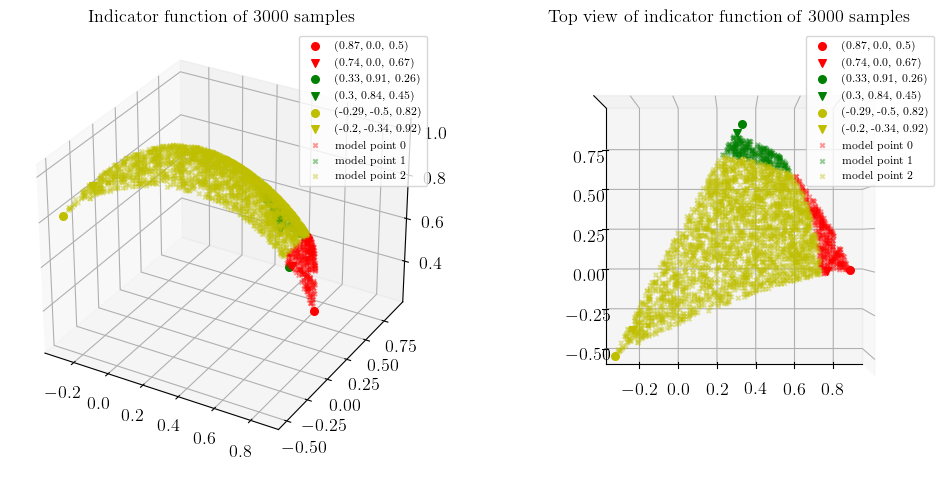

In [183]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

for ax in axs:
    ax.set_frame_on(False)
    # remove x, y, z ticks
    ax.set_xticks([])
    ax.set_yticks([])

# First subplot with 3D view
ax = axs[0]
ax = fig.add_subplot(121, projection="3d")
ax.set_box_aspect([1,1,0.8])
C = ['r', 'g', 'y']
for i in range(3):
    ax.scatter(model_pts_array[i, 0], model_pts_array[i, 1], model_pts_array[i, 2], s=30, c=C[i], zorder=5, marker='o', label=f"({np.round(model_pts_array[i, 0], 2)}, {np.round(model_pts_array[i, 1], 2)}, {np.round(model_pts_array[i, 2], 2)})")
    ax.scatter(x_i_tilda[i], y_i_tilda[i], z_i_tilda[i], s=30, c=C[i], zorder=5, marker='v', label=f"({np.round(x_i_tilda[i], 2)}, {np.round(y_i_tilda[i], 2)}, {np.round(z_i_tilda[i], 2)})")
# ax.scatter(base_pt_array[0], base_pt_array[1], base_pt_array[2], s=50, c='b', zorder=5, marker='x', label=f"({base_pt_array[0]}, {base_pt_array[1]}, {base_pt_array[2]})")
for i in range(indicator_array.shape[1]):
    ax.scatter(sample_points_array[indicator_array[:, i] == 1, 0], sample_points_array[indicator_array[:, i] == 1, 1], sample_points_array[indicator_array[:, i] == 1, 2], s=10, c=C[i], zorder=5, marker='x', alpha=0.4, label=f"model point {i}")
ax.legend(loc = 'best')
ax.set_title("Indicator function of {} samples".format(sample_points_array.shape[0]))
# Second subplot with top view
ax = axs[1]
ax = fig.add_subplot(122, projection="3d")
ax.view_init(elev=90, azim=-90)  # Top view
ax.set_box_aspect([1,1,0.8])
for i in range(3):
    ax.scatter(model_pts_array[i, 0], model_pts_array[i, 1], model_pts_array[i, 2], s=30, c=C[i], zorder=5, marker='o', label=f"({np.round(model_pts_array[i, 0], 2)}, {np.round(model_pts_array[i, 1], 2)}, {np.round(model_pts_array[i, 2], 2)})")
    ax.scatter(x_i_tilda[i], y_i_tilda[i], z_i_tilda[i], s=30, c=C[i], zorder=5, marker='v', label=f"({np.round(x_i_tilda[i], 2)}, {np.round(y_i_tilda[i], 2)}, {np.round(z_i_tilda[i], 2)})")
# ax.scatter(base_pt_array[0], base_pt_array[1], base_pt_array[2], s=50, c='b', zorder=5, marker='x', label=f"({base_pt_array[0]}, {base_pt_array[1]}, {base_pt_array[2]})")
for i in range(indicator_array.shape[1]):
    ax.scatter(sample_points_array[indicator_array[:, i] == 1, 0], sample_points_array[indicator_array[:, i] == 1, 1], sample_points_array[indicator_array[:, i] == 1, 2], s=10, c=C[i], zorder=5, marker='x', alpha=0.4, label=f"model point {i}")
ax.set_zticks([])  # Turn off z axis
ax.legend(loc = 'best')
ax.set_title("Top view of indicator function of {} samples".format(sample_points_array.shape[0]))

plt.show()